In [1]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape) # (60000, 28, 28)
print(test_images.shape) # (10000, 28, 28)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [2]:
import numpy as np
train_images = np.pad(train_images, ((0, 0), (2, 2), (2, 2))).reshape((60000, 32, 32, 1))
test_images = np.pad(test_images, ((0, 0), (2, 2), (2, 2))).reshape((10000, 32, 32, 1))

In [3]:
train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255
print(train_images.shape)
print(test_images.shape)

(60000, 32, 32, 1)
(10000, 32, 32, 1)


In [4]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)
print(train_labels[:5])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [6]:
from keras import models
from keras import layers
model = models.Sequential()

# C1. 합성곱 계층
model.add(layers.Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 1),padding='valid'))

# S2. 평균 풀링
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=2))

# C3. 합성곱 계층
model.add(layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu', padding='valid'))

# S4. 평균 풀링
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=2)) # 결과는 5x5 Feature Map

# C5. 120개의 5x5 필터를 사용하여 완전연결계층으로 연결되는 합성곱 계층. 결과는 1x1
model.add(layers.Conv2D(filters=120, kernel_size=(5, 5), activation='relu', padding='valid'))

# multi dimension(3D)을 한 개 차원으로 축소하는 Flatten
model.add(layers.Flatten())

# F6. 완전연결층
model.add(layers.Dense(units=84, activation='relu'))

# 분류를 위해 소프트맥스 활성화 함수를 갖는 완전연결층
model.add(layers.Dense(units=10, activation='softmax'))

# 모델 요약
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_2 (Avera  (None, 14, 14, 6)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_4 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_3 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                                 
 conv2d_5 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten_1 (Flatten)         (None, 120)              

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['acc'])

history = model.fit(train_images, train_labels, epochs=10,batch_size=128, validation_data=(test_images, test_labels))

Epoch 1/10
469/469 [==============================] - 36s 74ms/step - loss: 0.3755 - acc: 0.8908 - val_loss: 0.1180 - val_acc: 0.9632
Epoch 2/10
469/469 [==============================] - 34s 72ms/step - loss: 0.1042 - acc: 0.9679 - val_loss: 0.0683 - val_acc: 0.9807
Epoch 3/10
469/469 [==============================] - 35s 75ms/step - loss: 0.0738 - acc: 0.9777 - val_loss: 0.0520 - val_acc: 0.9840
Epoch 4/10
469/469 [==============================] - 36s 76ms/step - loss: 0.0574 - acc: 0.9823 - val_loss: 0.0493 - val_acc: 0.9837
Epoch 5/10
469/469 [==============================] - 34s 73ms/step - loss: 0.0481 - acc: 0.9848 - val_loss: 0.0517 - val_acc: 0.9830
Epoch 6/10
469/469 [==============================] - 33s 71ms/step - loss: 0.0417 - acc: 0.9870 - val_loss: 0.0449 - val_acc: 0.9860
Epoch 7/10
469/469 [==============================] - 34s 72ms/step - loss: 0.0371 - acc: 0.9882 - val_loss: 0.0306 - val_acc: 0.9904
Epoch 8/10
469/469 [==============================] - 33s 69ms

In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 2s 7ms/step - loss: 0.0427 - acc: 0.9870
test_acc: 0.9869999885559082


In [9]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
print('Accuracy of each epoch:', acc)
epochs = range(1, len(acc) +1)

Accuracy of each epoch: [0.89083331823349, 0.9678500294685364, 0.9776666760444641, 0.9823333621025085, 0.9847833514213562, 0.9869666695594788, 0.9881666898727417, 0.9901666641235352, 0.9910833239555359, 0.9920166730880737]


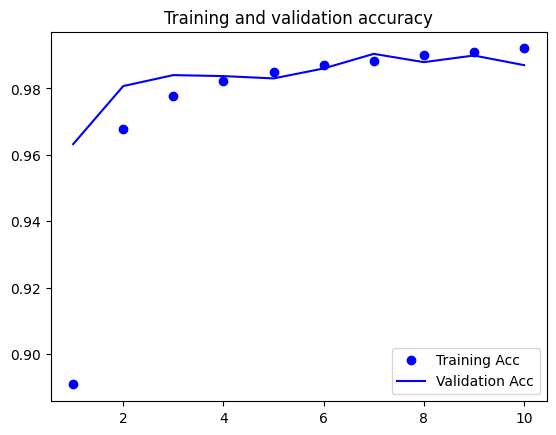

In [10]:
import matplotlib.pyplot as plt
plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training and validation accuracy')
plt.legend()

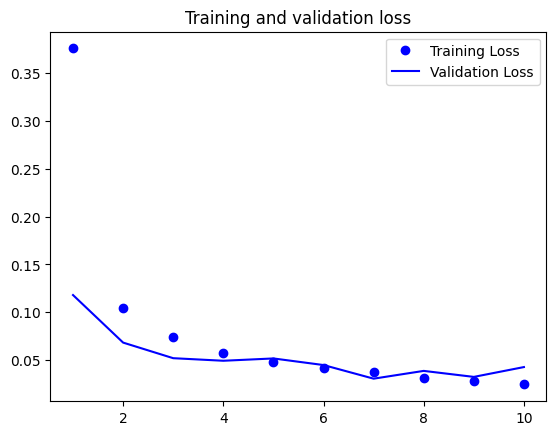

In [11]:
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

In [12]:
#랜덤 한 개 이미지 추출
import numpy as np
sample = np.random.choice(np.arange(0, len(test_images)))
print(sample)
print(test_labels[sample])

4812
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [22]:
# 모델을 사용해 예측
# 슬라이싱으로 한 개 이미지를 (1, 32, 32, 1)로 가져온다
predictions = model.predict(test_images[sample:sample+1, :, :, :])
print(predictions)

# 가장 큰 확률의 인덱스
print(np.argmax(predictions, axis=1)) # 리스트 형태로 나오기에 정수 표현을 위해 [0]으로 값을 추출함.
predicted_class = np.argmax(predictions, axis=1)[0]
print("예측된 숫자:", predicted_class)

# 클래스별 확률
print("\n클래스별 확률:")
for i, prob in enumerate(predictions[0]):
  print(f"Class {i}: {prob:.4f}")

1/1 [==============================] - 0s 38ms/step
[[2.0302666e-08 4.5981096e-08 9.9999928e-01 5.3565818e-09 2.0293035e-11
  3.3112430e-12 7.6410892e-11 1.6404291e-08 5.8338611e-07 3.0372447e-13]]
[2]
예측된 숫자: 2

클래스별 확률:
Class 0: 0.0000
Class 1: 0.0000
Class 2: 1.0000
Class 3: 0.0000
Class 4: 0.0000
Class 5: 0.0000
Class 6: 0.0000
Class 7: 0.0000
Class 8: 0.0000
Class 9: 0.0000


image_array shape: (32, 32, 1)
예측된 숫자: 2


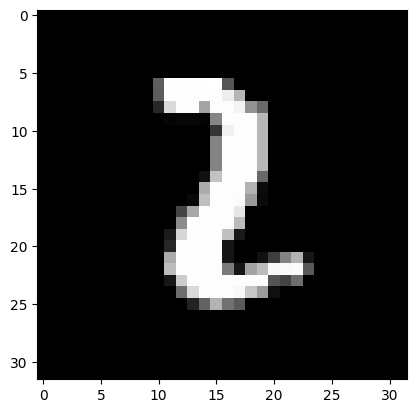

In [23]:
from keras.utils import array_to_img
import matplotlib.pyplot as plt

image_array = test_images[sample]
print("image_array shape:", image_array.shape)
print("예측된 숫자:", predicted_class)

# 배열을 이미지 객체로 변환
image = array_to_img(image_array)

# 정답 이미지 출력
plt.imshow(image, cmap='gray') # 흑백 이미지로 출력
plt.show()